<a href="https://colab.research.google.com/github/caiogomide/imersao-dados-2021/blob/main/notebooks/aula-1/aula_1_conteudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Aula 01 - Análise de dados, python, pandas e novos fármacos**



#### 1.1 Importação de Biblioteca e Base de Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

In [4]:
dados = pd.read_csv(url_dados, compression='zip')

#### 1.2 Visualização Dataframe de Experimentos

*   **id:** A identificação única do experimento realizado;
*   **tratamento:** O tipo de tratamento realizado, se foi feito utilizando uma droga ou um objeto de controle para efeitos de comparação;
*   **tempo:** Após quanto tempo foram analisados os resultados dos experimentos;
*   **dose:** O tipo de dose testado;
*   **g-0 -> g-771:** Variação da expressão gênica após os experimentos realizados;
*   **c-0 -> c-99:** Viabilidade celular após o teste com a droga ou controle;







In [23]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


#### 1.3 Análise dos Valores categóricos das Variáveis


###### 1.3.1 Tratamento


In [6]:
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

**Conclusão:** os tratamentos são divididos entre os que foram feito com drogas e outros que foram feitos com um objeto de controle

###### 1.3.2 Tempo

In [7]:
dados['tempo'].unique()

array([24, 72, 48])

**Conclusão**: os resultados dos experimentos foram observados em três periodos de tempo diferentes:


*   24 Horas
*   48 Horas
*   72 Horas



##### 1.3.3 Doses

In [ ]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

**Conclusão:** dois tipos de doses foram testados

#### 1.4 Análise de Distribuição de Frequências dos Valores

##### 1.4.1 Tratamento


###### Análise de Tabela

In [9]:
dist_freq_tratamento = pd.DataFrame()
#Obtenção da frequência absoluta dos tratamentos feitos com droga e com controle
dist_freq_tratamento['frequencia_absoluta'] = dados['tratamento'].value_counts()
#Obtenção da frequência relativa dos tratamentos feitos com droga e com controle
dist_freq_tratamento['frequencia_relativa'] = (dados['tratamento'].value_counts(normalize=True) * 100).map('{:.2f}%'.format)
#Nomeação do indice para tratamento
dist_freq_tratamento.index.rename('tratamento', inplace=True)
dist_freq_tratamento

,frequencia_absoluta,frequencia_relativa
tratamento,,
com_droga,21948,92.16%
com_controle,1866,7.84%


**Conclusão**: os estudos foram realizados majoritariamente com drogas (92.16%), há uma clara discrepância entre a frequência dos dois tipos de tratamento. Esta diferença deverá ser analisada com cuidado ao longo do estudo.


###### Análise gráfica

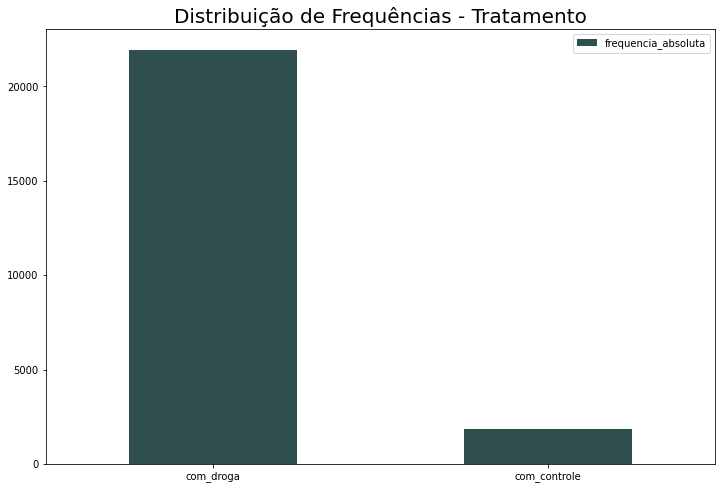

In [10]:
#Plotagem dos dados de frequência de tratamento em forma de gráfico de barra
grafico_freq_tratamento = dist_freq_tratamento.plot.bar(rot=0, figsize=(12,8), color='darkslategray')
#Adição de titulo e edição do tamanho da fonte do mesmo
grafico_freq_tratamento.set_title('Distribuição de Frequências - Tratamento', fontsize=20)
#Exclusão da label tratamento para evitar redundância no gráfico
grafico_freq_tratamento.set_xlabel('')
plt.show()

##### 1.4.2 Tempo


######Análise de Tabela

In [11]:
dist_freq_tempo = pd.DataFrame()
#Obtenção da frequência absoluta dos tratamentos feitos em 24, 48 e 72 horas
dist_freq_tempo['frequencia_absoluta'] = dados['tempo'].value_counts()
#Obtenção da frequência relativa dos tratamentos feitos em 24, 48 e 72 horas
dist_freq_tempo['frequencia_relativa'] = (dados['tempo'].value_counts(normalize=True) * 100).map('{:.2f}%'.format)
#Nomeação do indice para tempo
dist_freq_tempo.index.rename('tempo', inplace=True)

In [12]:
dist_freq_tempo

,frequencia_absoluta,frequencia_relativa
tempo,,
48,8250,34.64%
72,7792,32.72%
24,7772,32.64%


**Conclusão**: os resultados dos tratamentos foram analisados proporcionalmente 24, 48 e 72 horas após os experimentos, não foram observadas grandes discrepâncias.

###### Análise Gráfica

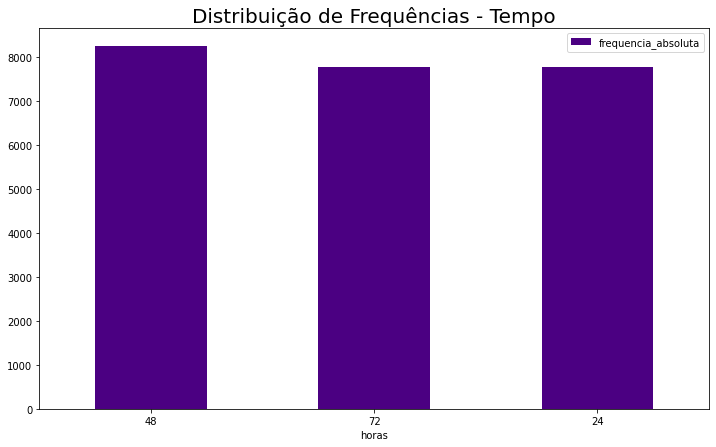

In [ ]:
#Plotagem dos dados de frequência de tempo em forma de gráfico de barra
grafico_freq_tempo = dist_freq_tempo.plot.bar(rot=0, figsize=(12,7), color='indigo')
#Adição de titulo e edição do tamanho da fonte do mesmo
grafico_freq_tempo.set_title('Distribuição de Frequências - Tempo', fontsize=20)
#Exclusão da label horas para evitar redundância no gráfico
grafico_freq_tempo.set_xlabel('horas')
plt.show()

##### 1.4.3 Dose

###### Análise de Tabela

In [14]:
dist_freq_dose = pd.DataFrame()
#Obtenção da frequência absoluta dos tratamentos feitos com dose D1 e D2
dist_freq_dose['frequencia_absoluta'] = dados['dose'].value_counts()
#Obtenção da frequência relativa dos tratamentos feitos com dose D1 e D2
dist_freq_dose['frequencia_relativa'] = (dados['dose'].value_counts(normalize=True) * 100).map('{:.2f}%'.format)
#Nomeação do indice para dose
dist_freq_dose.index.rename('dose', inplace=True)

In [15]:
dist_freq_dose

,frequencia_absoluta,frequencia_relativa
dose,,
D1,12147,51.01%
D2,11667,48.99%


**Conclusão**: Há uma proporcionalidade entre os tratamentos feitos com dose D1 e D2, não foram observadas grandes discrepâncias.

###### Análise Gráfica

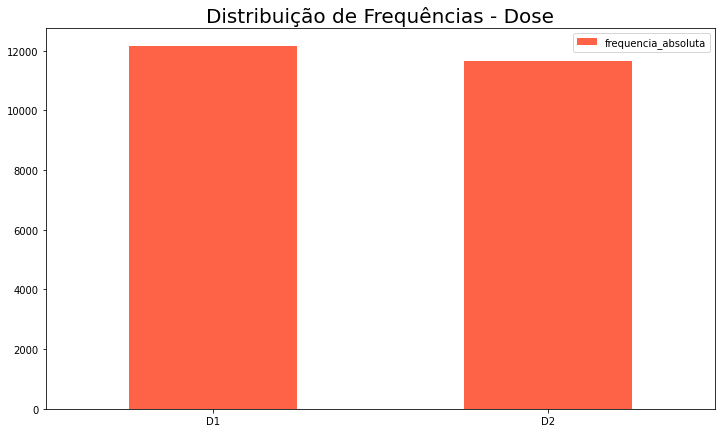

In [ ]:
#Plotagem dos dados de frequência de doses em forma de gráfico de barra
grafico_freq_dose = dist_freq_dose.plot.bar(rot=0, figsize=(12,7), color='tomato')
#Adição de titulo e edição do tamanho da fonte do mesmo
grafico_freq_dose.set_title('Distribuição de Frequências - Dose', fontsize=20)
#Exclusão da label dose para evitar redundância no gráfico
grafico_freq_dose.set_xlabel('')
plt.show()